In [2]:
import json

### Dataclasses based on the documentation (Some of the documentation is outdated, so this is not guaranteed to be right)

In [1]:
from dataclasses import dataclass
from typing import Literal, List
from enum import Enum

class Side(str, Enum):
    BUY = "BUY"
    SELL = "SELL"

@dataclass
class OrderSummary:
    size: str  # or float if you want to convert from string
    price: str  # or float if you want to convert from string

@dataclass
class BookMessage:
    asset_id: str
    market: str
    timestamp: str
    hash: str
    bids: List[OrderSummary]
    asks: List[OrderSummary]
    event_type: str = "book"

@dataclass
class PriceChange:
    asset_id: str
    price: str  # can convert to float if needed
    size: str   # can convert to float if needed
    side: Side
    hash: str
    best_bid: str
    best_ask: str

@dataclass
class PriceChangeEvent:
    market: str
    price_changes: List[PriceChange]
    timestamp: str
    event_type: str = "price_change"

@dataclass
class TickSizeChangeEvent:
    asset_id: str
    market: str # condition_id
    old_tick_size: str
    new_tick_size: str
    timestamp: str
    event_type: str = "tick_size_change"

@dataclass
class LastTradePriceEvent:
    asset_id: str
    fee_rate_bps: str
    market: str # condition_id
    price: str
    side: Side
    size: str
    timestamp: str
    event_type = "last_trade_price"

### Parsing Data From the Market Stream

In [6]:
with open ("btc_8_815_updown.json") as f:
    data = json.load(f)

In [14]:
EVENT_TYPES = {
    "last_trade_price": LastTradePriceEvent,
    "tick_size_change": TickSizeChangeEvent,
    "price_change": PriceChangeEvent,
    "book": BookMessage
}

In [22]:
def parse_book(book_message):
    condition_id = book_message['market']
    asset_id = book_message['asset_id']
    timestamp = book_message['timestamp']
    hash = book_message['hash'] # hash summary of orderbook content
    bids = book_message['bids']
    asks = book_message['asks']

    # use this to generate updates
    order_book_updates = []
    for bid in bids:
        update = {
            "asset_id": asset_id,
            "timestamp": timestamp,
            "price": bid['price'],
            "size": bid['size'],
            "side": "bid",
        }
        order_book_updates.append(update)
    for ask in asks:
        update = {
            "asset_id": asset_id,
            "timestamp": timestamp,
            "price": ask['price'],
            "size": ask['size'],
            "side": "ask",
        }
        order_book_updates.append(update)

    return order_book_updates

In [33]:
def parse_price_change(price_change_event):
    condition_id = price_change_event['market']
    price_changes = price_change_event['price_changes']
    timestamp = price_change_event['timestamp']
    order_book_updates = []
    
    for price_change in price_changes:
        # NOTE, also has best bid and best ask data, but idrc
        update = {
                "asset_id": price_change['asset_id'],
                "timestamp": timestamp,
                "price": price_change['price'],
                "size": price_change['size'],
                "side": "bid" if 'side' == "BUY" else "ask"
            }
        order_book_updates.append(update)

    return order_book_updates

In [29]:
data[1]

{'market': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
 'price_changes': [{'asset_id': '101160920341113437254721927007904783071619510617577160798815803852851616980409',
   'price': '0.47',
   'size': '22',
   'side': 'BUY',
   'hash': 'eaa7eb8f4c2bfbb1575968ec19157561c98efbfa',
   'best_bid': '0.47',
   'best_ask': '0.5'},
  {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
   'price': '0.53',
   'size': '22',
   'side': 'SELL',
   'hash': 'e2160dd739e0a9891e31f5c2335f6c1196b82872',
   'best_bid': '0.5',
   'best_ask': '0.53'}],
 'timestamp': '1761652917077',
 'event_type': 'price_change'}

In [ ]:
def handle_event():
    pass

In [36]:
message

{'market': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
 'price_changes': [{'asset_id': '101160920341113437254721927007904783071619510617577160798815803852851616980409',
   'price': '0.2',
   'size': '0',
   'side': 'BUY',
   'hash': 'd87cb0b4e602ddbfc0bee64082bcafdd20e87151',
   'best_bid': '0',
   'best_ask': '1'},
  {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
   'price': '0.8',
   'size': '0',
   'side': 'SELL',
   'hash': '2403e70846d15c8412afabef115a5548cedf5d89',
   'best_bid': '0',
   'best_ask': '1'}],
 'timestamp': '1761653765562',
 'event_type': 'price_change'}

In [43]:
trade_event = []
for message in data:
    if isinstance(message, list):
        for event in message:
            event_type = event['event_type']
            if event_type == "book":
                order_book_updates = parse_book(event)
            elif event_type == "price_change":
                order_book_updates = parse_price_change(event)
            elif event_type == "tick_size_change":
                pass # old tick size vs new tick size
            elif event_type == "last_trade_price":
                pass
                trade_event.append(event)
            else:
                pass

    elif isinstance(message, dict):
        event = message
        event_type = event['event_type']
        if event_type == "book":
            order_book_updates = parse_book(event)
        elif event_type == "price_change":
            order_book_updates = parse_price_change(event)
        elif event_type == "tick_size_change":
            pass # old tick size vs new tick size
            print("TICK")
        elif event_type == "last_trade_price":
            trade_event.append(event)
            print("TRADE")
        else:
            pass
    else:
        pass

            
                


TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRADE
TRAD

In [59]:
trade_event[230]

{'market': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
 'asset_id': '101160920341113437254721927007904783071619510617577160798815803852851616980409',
 'price': '0.79',
 'size': '30',
 'fee_rate_bps': '0',
 'side': 'BUY',
 'timestamp': '1761653294004',
 'event_type': 'last_trade_price',
 'transaction_hash': '0x9f98780854ec4ca54849181cf4c4bed380a337dde52372b10c0ef2888ae4a9f0'}

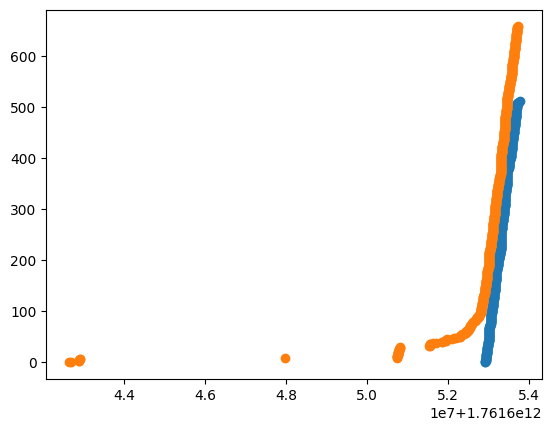

In [73]:
import matplotlib.pyplot as plt
plt.scatter([int(e['timestamp']) for e in trade_event], range(len(trade_event)))
plt.scatter([int(e['timestamp'])*1000 for e in trades[::-1]], range(len(trades)))

In [40]:
import requests
url = "https://data-api.polymarket.com/trades"
params = {
    "limit": 500,
    "offset": 0,
    "market": ['0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176'],
    # "takerOnly": "true",
}
response = requests.get(url, params=params)
trades = []
while len(response.json()):
    trades += response.json()
    params['offset'] += 500
    response = requests.get(url, params=params)

In [60]:
# NOTE NEED AN AUTHENTICATED USER
# url = "https://clob.polymarket.com/data/trades"
# params = {
#     "market": ['0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176'],
# }
# response = requests.get(url, params=params)

In [61]:
response.json()

{'error': 'Unauthorized/Invalid api key'}

In [58]:
trades[60]

{'proxyWallet': '0xca85f4b9e472b542e1df039594eeaebb6d466bf2',
 'side': 'SELL',
 'asset': '101160920341113437254721927007904783071619510617577160798815803852851616980409',
 'conditionId': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
 'size': 50,
 'price': 0.89,
 'timestamp': 1761653611,
 'title': 'Bitcoin Up or Down - October 28, 8:00AM-8:15AM ET',
 'slug': 'btc-updown-15m-1761652800',
 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png',
 'eventSlug': 'btc-updown-15m-1761652800',
 'outcome': 'Down',
 'outcomeIndex': 1,
 'name': 'aespakarina',
 'pseudonym': 'Idle-Exaggeration',
 'bio': 'im like some kind of supernova',
 'profileImage': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/profile-image-903202-8b12b8b3-d90d-4357-98bc-2816f761a91e.jpg',
 'profileImageOptimized': '',
 'transactionHash': '0x31360363295facbcad46ebc25308fea7bb41fbfa7f2bde681d123d71336936b4'}

In [41]:
len(trades)

659

In [39]:
len(response.json())

500

In [35]:
# KEEP GOING FOR TESTING AS TO WHAT HAPPENS WHEN A MARKET DIES FROM THE OTHER NOTEBOOK
import datetime as dt
import websockets
url = 'wss://ws-subscriptions-clob.polymarket.com/ws/market'
last_time_pong = dt.datetime.now()
asset_ids = ["111982930202787843078370123399827216485506399038350852586731005165614131335546"]
msgs = []
async with websockets.connect(url) as websocket:
    await websocket.send(json.dumps({"assets_ids":asset_ids,"type":"market"}))

    while len(msgs) < 20:
        m = await websocket.recv()
        if m != "PONG":
            last_time_pong = dt.datetime.now()
        try:
            d = json.loads(m)
            msgs.append(d)
            # print(d)
            print(len(msgs))
        except json.JSONDecodeError:
            print("Received non-JSON message:", m)
            continue
        
        if last_time_pong + dt.timedelta(seconds=10) < dt.datetime.now():
            await websocket.send("PING")

1


CancelledError: 

In [20]:
condition_id = event['market']
asset_id = event['asset_id']
timestamp = event['timestamp']
hash = event['hash'] # hash summary of orderbook content
bids = event['bids']
asks = event['asks']

# use this to generate updates
order_book_updates = []
for bid in bids:
    update = {
        "asset_id": asset_id,
        "timestamp": timestamp,
        "price": bid['price'],
        "size": bid['size'],
        "side": "bid",
    }
    order_book_updates.append(update)
for ask in asks:
    update = {
        "asset_id": asset_id,
        "timestamp": timestamp,
        "price": ask['price'],
        "size": ask['size'],
        "side": "ask",
    }
    order_book_updates.append(update)

# TODO -> will need to normalize so that each order doesn't have this massive asset id to contend with

In [21]:
order_book_updates

[{'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'price': '0.01',
  'size': '83039',
  'side': 'bid'},
 {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'price': '0.02',
  'size': '2366',
  'side': 'bid'},
 {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'price': '0.03',
  'size': '1488',
  'side': 'bid'},
 {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'price': '0.04',
  'size': '1245',
  'side': 'bid'},
 {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'price': '0.05',
  'size': '370',
  'side': 'bid'},
 {'asset_id': '1055655633950338839854046162662762619202035309496699122380752490221130

In [19]:
data[1]

{'market': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
 'price_changes': [{'asset_id': '101160920341113437254721927007904783071619510617577160798815803852851616980409',
   'price': '0.47',
   'size': '22',
   'side': 'BUY',
   'hash': 'eaa7eb8f4c2bfbb1575968ec19157561c98efbfa',
   'best_bid': '0.47',
   'best_ask': '0.5'},
  {'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
   'price': '0.53',
   'size': '22',
   'side': 'SELL',
   'hash': 'e2160dd739e0a9891e31f5c2335f6c1196b82872',
   'best_bid': '0.5',
   'best_ask': '0.53'}],
 'timestamp': '1761652917077',
 'event_type': 'price_change'}

In [11]:
data[0]

[{'market': '0x56f8de8878e825b73937be862fdcd7af2497c5b73df1dac0fd9113bf11846176',
  'asset_id': '105565563395033883985404616266276261920203530949669912238075249022113023944893',
  'timestamp': '1761652917071',
  'hash': 'fe7b74f4a47dcd77d7cd243198a72d130365a49a',
  'bids': [{'price': '0.01', 'size': '83039'},
   {'price': '0.02', 'size': '2366'},
   {'price': '0.03', 'size': '1488'},
   {'price': '0.04', 'size': '1245'},
   {'price': '0.05', 'size': '370'},
   {'price': '0.06', 'size': '173'},
   {'price': '0.07', 'size': '155'},
   {'price': '0.08', 'size': '127'},
   {'price': '0.09', 'size': '138'},
   {'price': '0.1', 'size': '360'},
   {'price': '0.11', 'size': '90'},
   {'price': '0.12', 'size': '70'},
   {'price': '0.13', 'size': '56'},
   {'price': '0.14', 'size': '56'},
   {'price': '0.15', 'size': '122'},
   {'price': '0.2', 'size': '65'},
   {'price': '0.28', 'size': '32'},
   {'price': '0.3', 'size': '80'},
   {'price': '0.33', 'size': '14'},
   {'price': '0.34', 'size': '2